### Context
This notebook uses the California Housing Dataset from Kaggle to build a multiple linear regression model for predicting median house values. The model utilizes all available features in the dataset to improve prediction accuracy and capture more complex relationships between variables.

**Key Steps:**
- Load and explore the dataset
- Preprocess the data, including encoding categorical features and scaling numerical values
- Train a multiple linear regression model
- Evaluate the model using performance metrics such as R² score, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE)
- Visualize predictions and analyze model performance

This analysis demonstrates how leveraging multiple features can enhance the accuracy of house price predictions.

###  Installing libs
-  Versions in this tutorial:
```
!pip install numpy==2.2.5
!pip install pandas==2.2.1
!pip install matplotlib==3.10.0
!pip install scikit-learn==1.6.1
```

### Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the California housing dataset

In [2]:
houses = pd.read_csv('datasets/housing-california.csv')

### Data Preprocessing

**Checking the columns and values**

In [3]:
houses.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [4]:
houses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Inspecting null values and cleaning**

In [5]:
houses.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
houses_cleaned = houses[houses['total_bedrooms'].notnull()]

In [7]:
houses_cleaned.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Encoding

This creates binary columns for each category of `ocean_proximity`

In [8]:
houses_cleaned = pd.get_dummies(houses_cleaned, columns=['ocean_proximity'], drop_first=True)

### Feature selection

Add powers or interaction terms of numeric features.

In [9]:
houses_cleaned.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,-0.484787,0.023525,0.160526,0.140378
ocean_proximity_INLAND,-0.055337,0.351084,-0.236968,0.026477,-0.006463,-0.019602,-0.038265,-0.237536,-0.484787,1.000000,-0.010681,-0.241356,-0.262289


We can observe that the biggest correlation is between `median_house_value` and `median_income` variables

### Cleaning and removing noisy

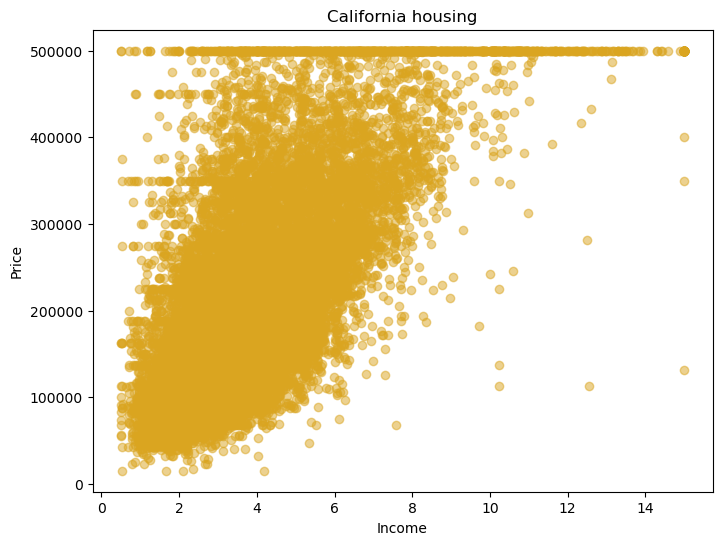

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(houses_cleaned['median_income'], houses_cleaned['median_house_value'],  alpha=0.5, color='goldenrod')
plt.xlabel('Income')
plt.ylabel('Price')
plt.title('California housing')
plt.show()

There are many income values fixed in 500000 house value and some outliers when income is greater than 9, we will removed it for normalization 

In [11]:
houses_reduced = houses_cleaned[ (houses_cleaned['median_house_value'] < 500000) & (houses_cleaned['median_income'] <= 9)]

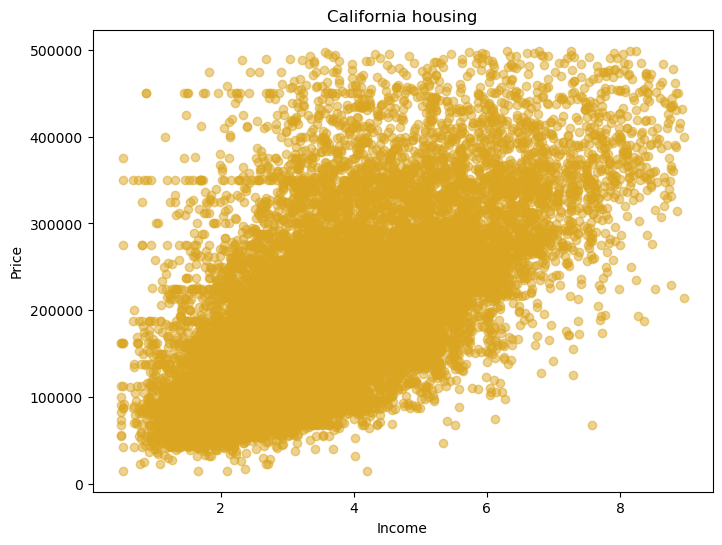

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(houses_reduced['median_income'], houses_reduced['median_house_value'],  alpha=0.5, color='goldenrod')
plt.xlabel('Income')
plt.ylabel('Price')
plt.title('California housing')
plt.show()

The following strategy allows linear models to learn nonlinear relationships by giving them nonlinear features.

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X = houses_reduced.drop('median_house_value', axis=1).to_numpy();
X_poly = poly.fit_transform(X)

### Scaling X and y

In [14]:
from sklearn.preprocessing import StandardScaler
y = houses_reduced['median_house_value'].to_numpy(); 

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X_poly)
y_scaled = scaler_y.fit_transform(y.reshape(-1,1))


### Splitting the data

Splitting data for training and testing where 80% is for training and 20% for testing

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

### Training the model

In [16]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Checking the model performance

In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.40
Mean Squared Error (MSE): 0.31
Root Mean Squared Error (RMSE): 0.56
R² Score: 0.6941


The model explains about 69% of the variance in the target variable based on the input features.

The coefficient of determination, commonly known as R², measures how well a regression model explains the variation in the target variable.
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

### Predicting the house value

In [18]:
house_features = X_poly[0]
house_features_scaled = scaler_X.transform(house_features.reshape(1,-1))

predicted_scaled = model.predict(house_features_scaled)
predicted_original = scaler_y.inverse_transform(predicted_scaled)


original_value = houses['median_house_value'].to_numpy()[0];
predicted_value = predicted_original[0][0];

print(f"Original house value: {original_value:.2f}")
print(f"Predicted house value: {predicted_value:.2f}")


Original house value: 452600.00
Predicted house value: 406944.46


### Visualizing the actual vs. predicted values

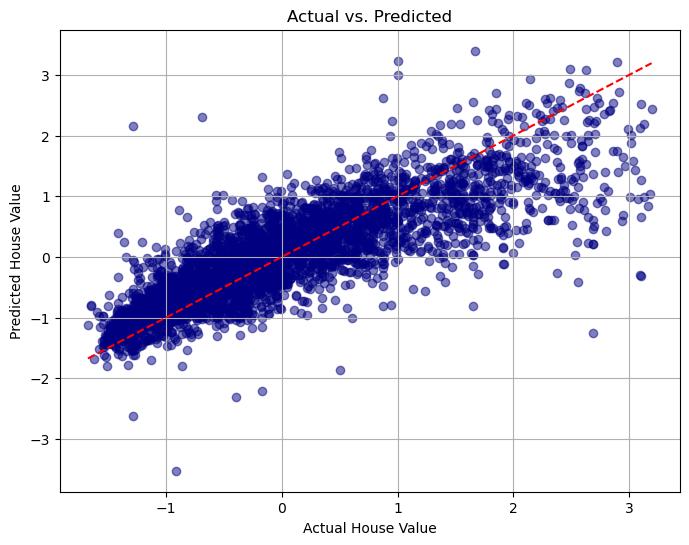

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='navy', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs. Predicted")
plt.grid(True)
plt.show()